# Kaggle 신용카드 부정결제 검출 
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* 보안상 스케일링된 데이터 : 피처가 무엇인지도 내용도 모르므로 EDA 불가, 분포는 동일하므로 모델링은 가능
* 클래스 불균형 데이터이므로 stratify 층화추출 필수, 모델평가지표 선정 주의
    * 정상결제 0 를 부정결제 1 로 예측
    * 부정결제 1 를 정상결제 0 로 예측  * 임팩트가 더 큼,  recall 중요
    * 그래서 부정결제를 postive(1)기준으로 잡는다.
* Class : <font color = 'blue'>'0' (정상결제)</font>, <font color = 'red'>'1' (부정결제)</font>
* 부정 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [80]:
import warnings
warnings.filterwarnings('ignore')

# I. wget From Github
* 'creditCardFraud.zip' 파일 다운로드

In [ ]:
# !wget https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip

--2023-01-08 13:54:41--  https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155672 (66M) [application/zip]
Saving to: ‘creditCardFraud.zip’

creditCardFraud.zip 100%[===================>]  65.95M   172MB/s    in 0.4s    

2023-01-08 13:54:46 (172 MB/s) - ‘creditCardFraud.zip’ saved [69155672/69155672]



* 다운로드 결과 확인

In [ ]:
# !ls -l 

total 67540
-rw-r--r-- 1 root root 69155672 Jan  8 13:54 creditCardFraud.zip
drwxr-xr-x 1 root root     4096 Jan  5 14:34 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [ ]:
# !unzip creditCardFraud.zip

Archive:  creditCardFraud.zip
  inflating: creditcard.csv          


* creditcard.csv 파일 확인

In [ ]:
# !ls -l

total 214836
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
-rw-r--r-- 1 root root  69155672 Jan  8 13:54 creditCardFraud.zip
drwxr-xr-x 1 root root      4096 Jan  5 14:34 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [110]:
# %%time

import pandas as pd

DF = pd.read_csv('../../../secret/homework_data/ML_credit_card/creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [111]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* '0' (정상) Class와 '1' (부정) Class 개수

In [112]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* '0' (정상) Class와 '1' (부정) Class 비율

In [113]:
(DF.Class.value_counts() / DF.shape[0]) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [114]:
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


> ## 4) Visualization

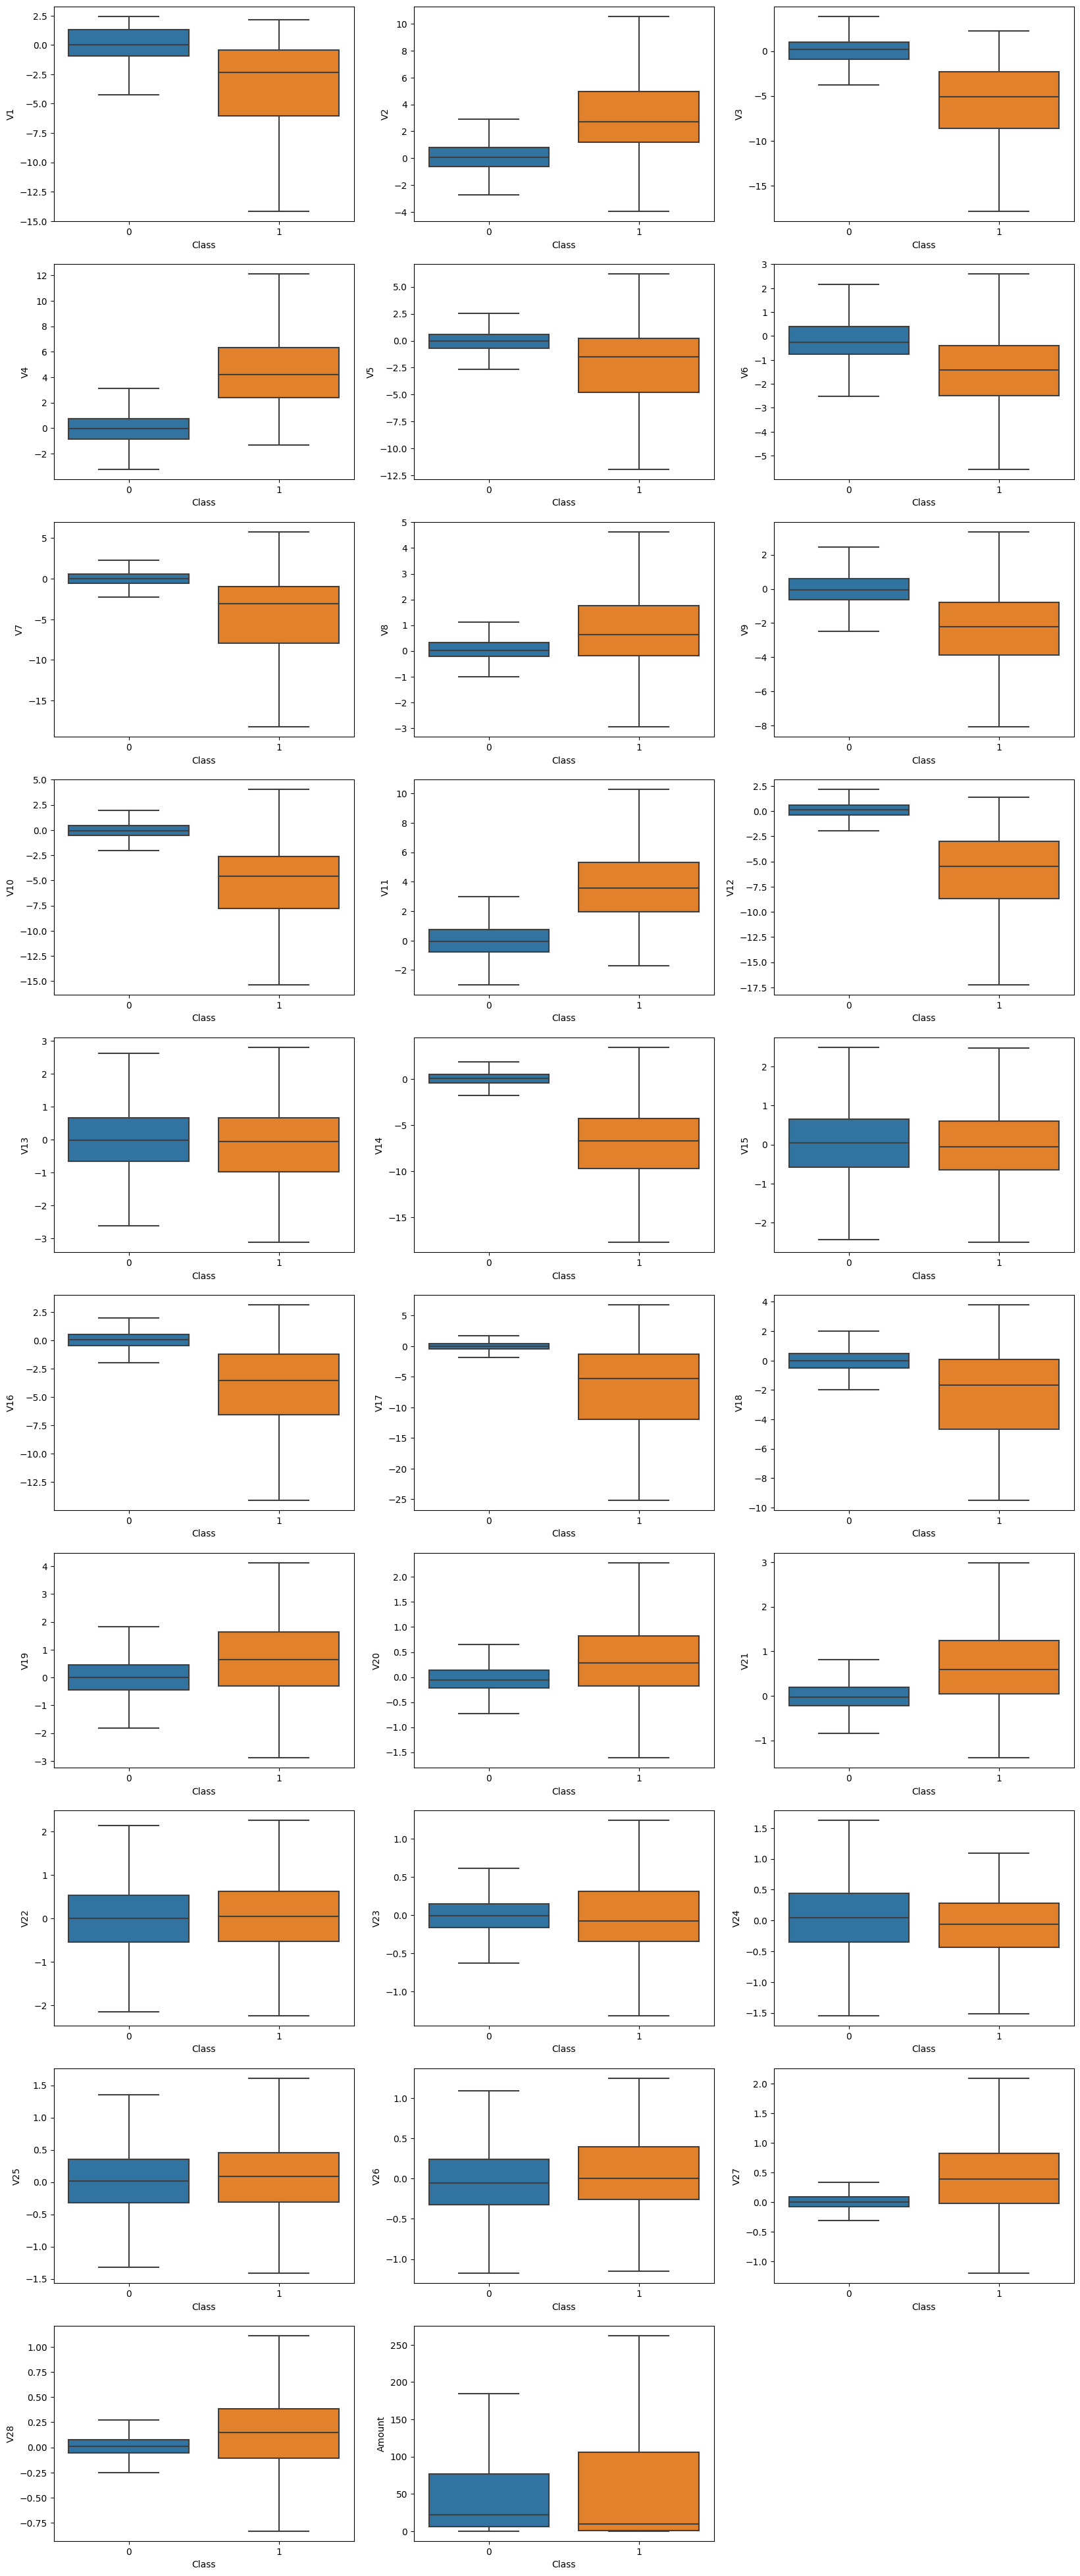

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 50))

for index, col_names in enumerate(DF.columns[:-1]):
  ax1 = plt.subplot(10, 3, index + 1)
  sns.boxplot(data = DF,
              x = 'Class', 
              y = col_names,
              order = [0, 1],
              showfliers = False, # 이상치 숨김
              ax = ax1)
  
plt.show()

In [118]:
# X = DF.iloc[:,:-2]

In [121]:
# # 변수가 너무 많아서 시각화 하기 어렵다. PCA를 해보자
# from sklearn.decomposition import PCA
# data = X
# pca = PCA(n_components=ㅋ)
# pca_array = pca.fit_transform(data)
# pca_df = pd.DataFrame(pca_array)
# pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.359809,0.072785,-2.536338,1.378146,0.338339,0.462324,0.239653,-0.098678,0.363770,-0.090780,-0.551203,0.617475,-0.991225,0.311480,1.467845
1,-1.191857,-0.266149,-0.166480,0.448153,-0.060014,-0.082371,-0.078807,-0.085100,-0.255418,0.166983,1.612778,-1.065250,0.489142,0.143864,0.635614
2,1.358353,1.340157,-1.773215,0.379788,0.503180,1.800560,0.791438,-0.247692,-1.514661,-0.207673,0.624106,-0.065857,0.717149,0.165562,2.345962
3,0.966276,0.185244,-1.792978,-0.863316,0.010363,1.247026,0.237676,-0.377391,-1.387006,0.055035,-0.225443,-0.178792,0.508153,0.288903,-0.631634
4,1.158229,-0.877758,-1.548729,0.403058,0.407137,0.096096,0.592924,0.270500,0.817676,-0.753201,-0.823960,-0.537748,1.345515,1.118615,0.174871


In [122]:
# # 주성분 적정 차원수를 결정하기 위한 설명력과 기여율 구하기
# import numpy as np
# result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
#              '기여율':pca.explained_variance_ratio_})
# result['누적기여율'] = result['기여율'].cumsum()
# result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
0,3.836489,0.124838,0.124838
1,2.726820,0.088729,0.213567
2,2.299029,0.074809,0.288376
3,2.004684,0.065231,0.353608
4,1.905081,0.061990,0.415598
5,1.774946,0.057756,0.473354
6,1.530401,0.049799,0.523153
7,1.426479,0.046417,0.569570
8,1.206992,0.039275,0.608845
9,1.185594,0.038579,0.647423


<AxesSubplot: >

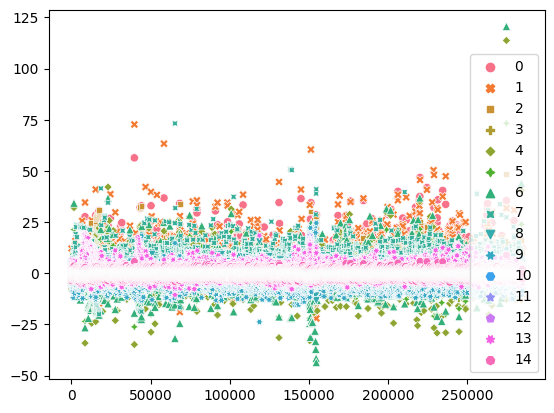

In [59]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.scatterplot(pca_df)

# III. train_test_split( )

* X (Input), y (Output) 지정

In [86]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

> ## 1) Without 'stratify'

In [87]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 불균형

In [88]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.825445
1     0.174555
Name: Class, dtype: float64
Test_Data : 
 0    99.831467
1     0.168533
Name: Class, dtype: float64


> ## 2) With 'stratify'

In [89]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [90]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


# IV. Modeling - Logistic Regression

> ## 1) Model 학습

In [13]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression()

> ## 2) 예측값 생성

In [14]:
y_hat = Model_lr.predict(X_test)

In [15]:
y_hat 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

> ## 3) Model 평가

* Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1,0] )
#    1  0
# 1
# 0

array([[  107,    41],
       [   18, 85277]], dtype=int64)

* Scores

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 1))
print(recall_score(y_test, y_hat, pos_label = 1))

0.9993094811745842
0.856
0.722972972972973


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['0정상', '1부정'],
                            digits = 5))

              precision    recall  f1-score   support

         0정상    0.99952   0.99979   0.99965     85295
         1부정    0.85600   0.72297   0.78388       148

    accuracy                        0.99931     85443
   macro avg    0.92776   0.86138   0.89177     85443
weighted avg    0.99927   0.99931   0.99928     85443



# V. Modeling - Decison Tree

> ## 1) Model 학습

In [25]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2045)

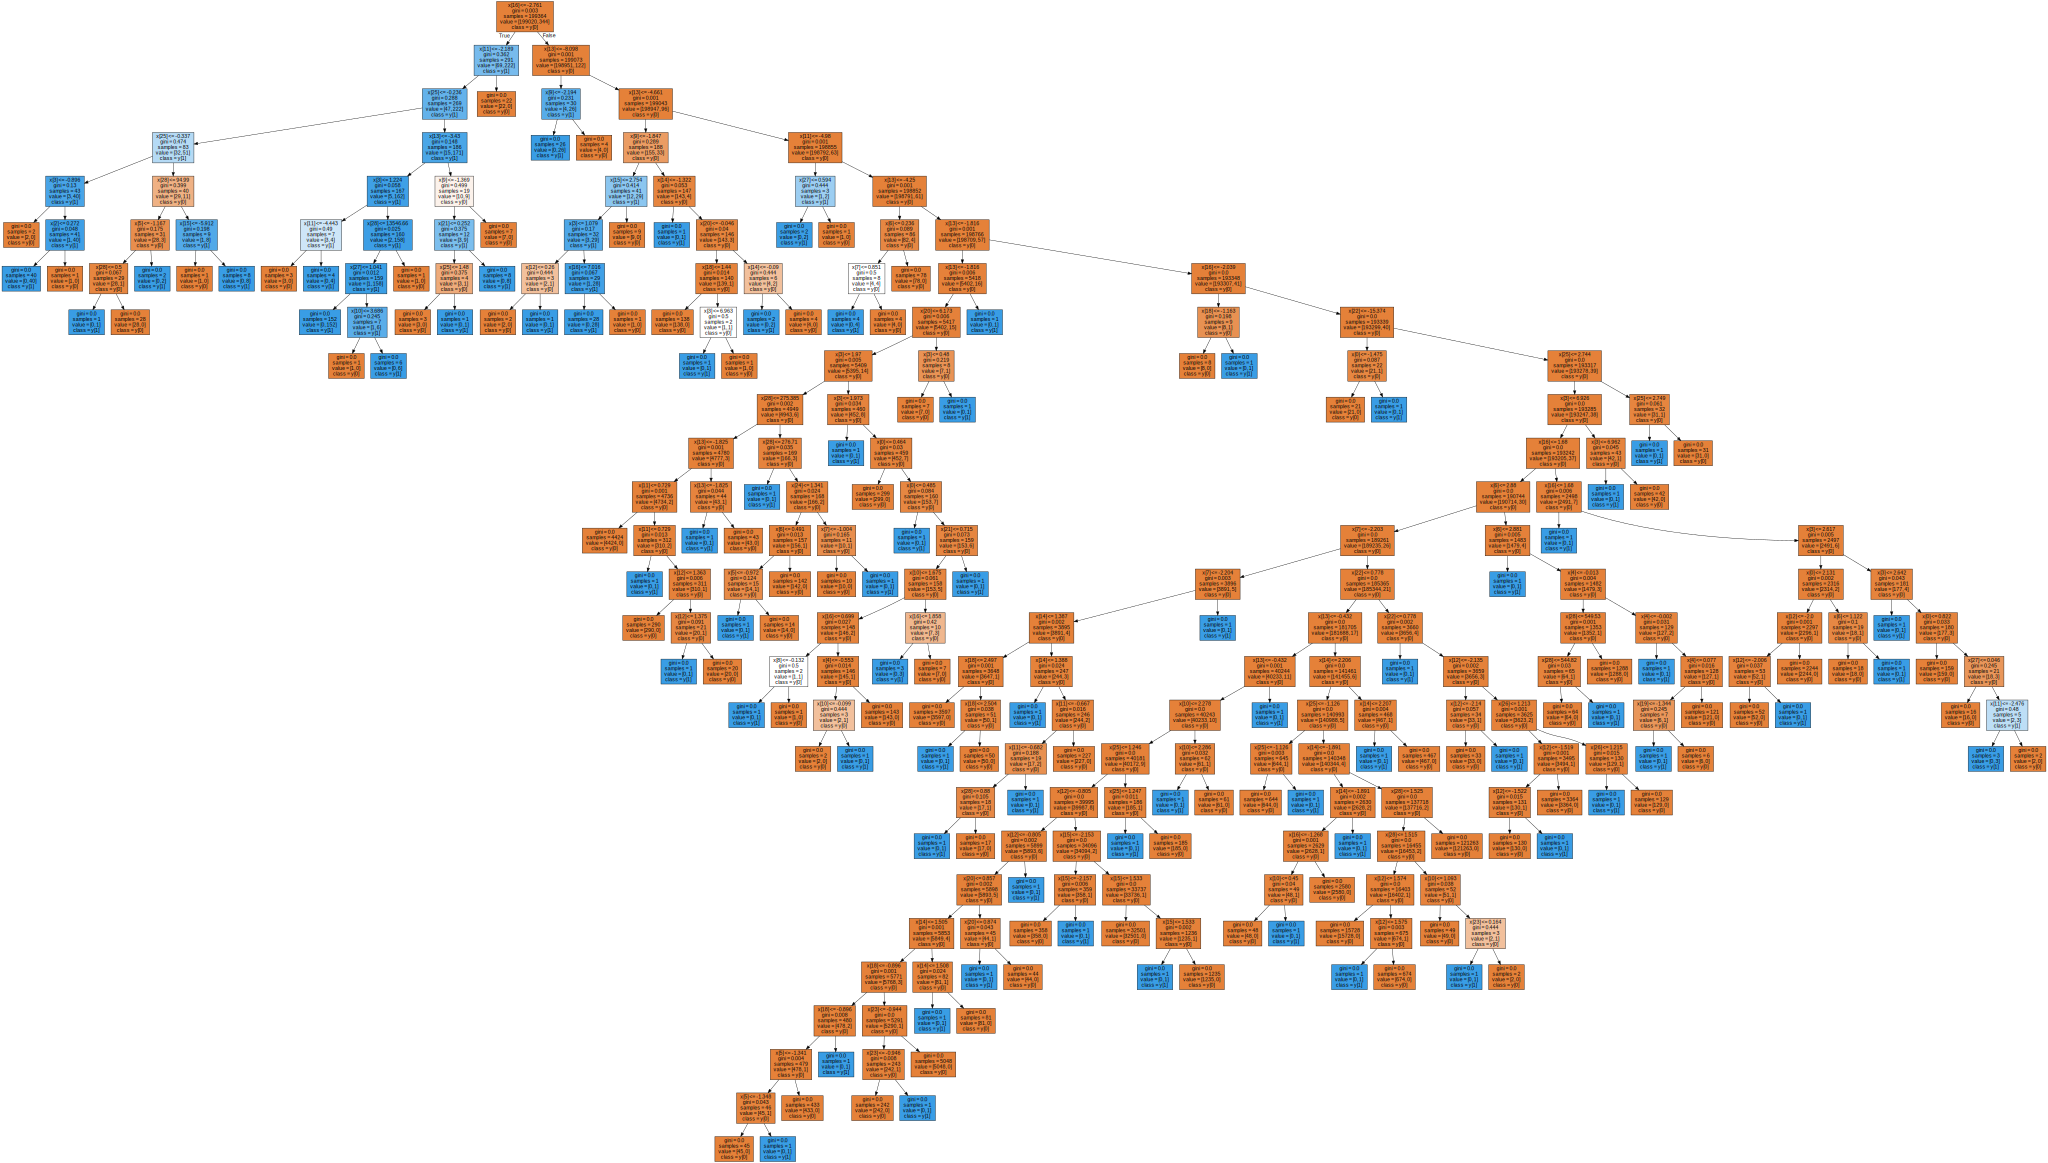

In [33]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_dt,
                                class_names = True,
                                filled = True))

> ## 2) 예측값 생성

In [34]:
y_hat = Model_dt.predict(X_test)

y_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

> ## 3) Model 평가

* Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1,0] )
#    1  0
# 1
# 0

array([[  120,    28],
       [   32, 85263]], dtype=int64)

* Scores

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 1))
print(recall_score(y_test, y_hat, pos_label = 1))

0.9992977774656788
0.7894736842105263
0.8108108108108109


In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['0정상', '1부정'],
                            digits = 5))

              precision    recall  f1-score   support

         0정상    0.99967   0.99962   0.99965     85295
         1부정    0.78947   0.81081   0.80000       148

    accuracy                        0.99930     85443
   macro avg    0.89457   0.90522   0.89982     85443
weighted avg    0.99931   0.99930   0.99930     85443



> ## 가지 개수 구하기

In [97]:
Model_dt.get_depth()

26

In [104]:
Model_dt.__getstate__()

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 2045,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
        'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
       dtype=object),
 'n_features_in_': 29,
 'n_outputs_': 1,
 'classes_': array([0, 1], dtype=int64),
 'n_classes_': 2,
 'max_features_': 29,
 'tree_': <sklearn.tree._tree.Tree at 0x26848f00d50>,
 '_sklearn_version': '1.2.0'}

> ## 1) Feature Importance 확인

In [61]:
Model_dt.feature_importances_

array([7.29199497e-03, 0.00000000e+00, 2.84097694e-03, 2.49045515e-02,
       4.26319150e-03, 1.07027868e-02, 1.11429056e-02, 1.13917669e-02,
       1.45600068e-03, 6.05171956e-02, 1.33539551e-02, 5.86451146e-02,
       1.94057763e-02, 1.03934964e-01, 1.83386321e-02, 2.52116024e-02,
       5.05319990e-01, 0.00000000e+00, 9.84893919e-03, 2.49600117e-03,
       5.03881243e-03, 7.08144206e-03, 3.04804401e-03, 4.85278524e-03,
       2.13941810e-04, 5.23613016e-02, 2.90962131e-03, 6.33262184e-03,
       2.70950849e-02])

In [76]:
len(Model_dt.feature_importances_)

29

In [91]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [92]:
len(X.columns)

29

> ## 2) Feature Importance 시각화

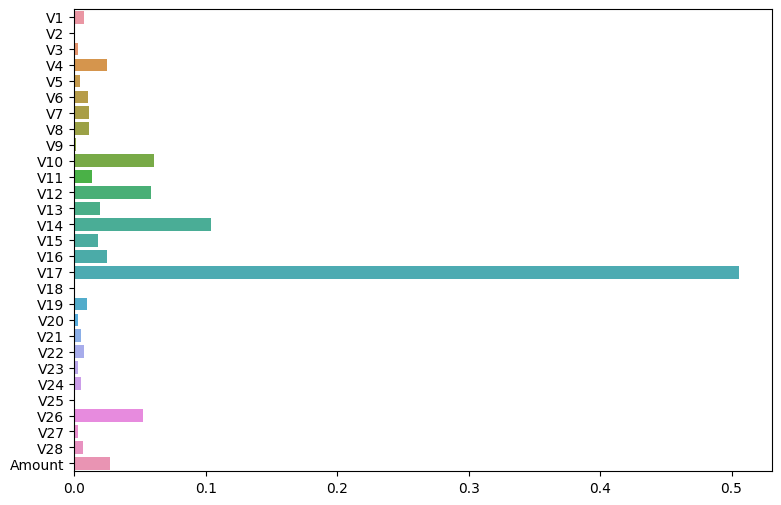

In [93]:
plt.figure(figsize = (9, 6))
sns.barplot(x = Model_dt.feature_importances_,
            y = X.columns)
plt.show()

# VI. Modeling - RandomForest (Ensemble)

> ## 1) Model 학습

* 약 4분

In [123]:
#%%time
from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier(random_state = 2045) # default 100개
Model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=2045)

> ## 2) 예측값 생성

In [124]:
y_hat = Model_rf.predict(X_test)

> ## 3) Model 평가

* Confusion Matrix

In [125]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  126,    22],
       [   12, 85283]], dtype=int64)

* Scores

In [126]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99974   0.99986   0.99980     85295
          부정    0.91304   0.85135   0.88112       148

    accuracy                        0.99960     85443
   macro avg    0.95639   0.92561   0.94046     85443
weighted avg    0.99959   0.99960   0.99960     85443



# 
# 
# 
# The End
# 
# 
# 